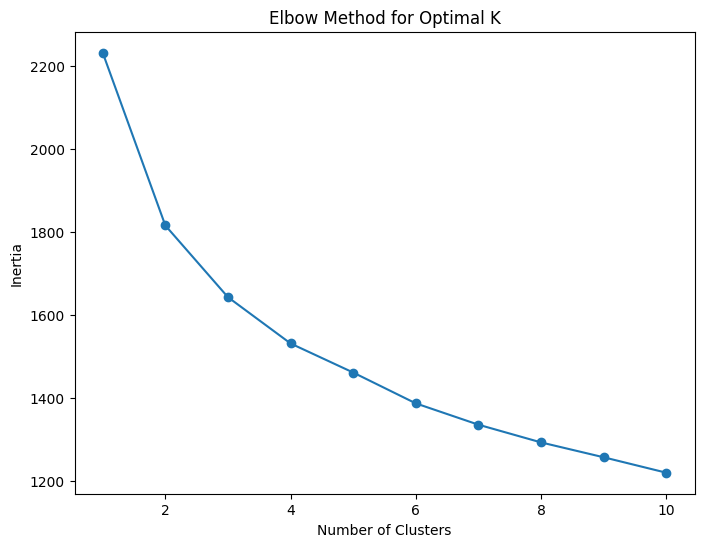

col_0     0    1
target          
0        41  123
1       100   39


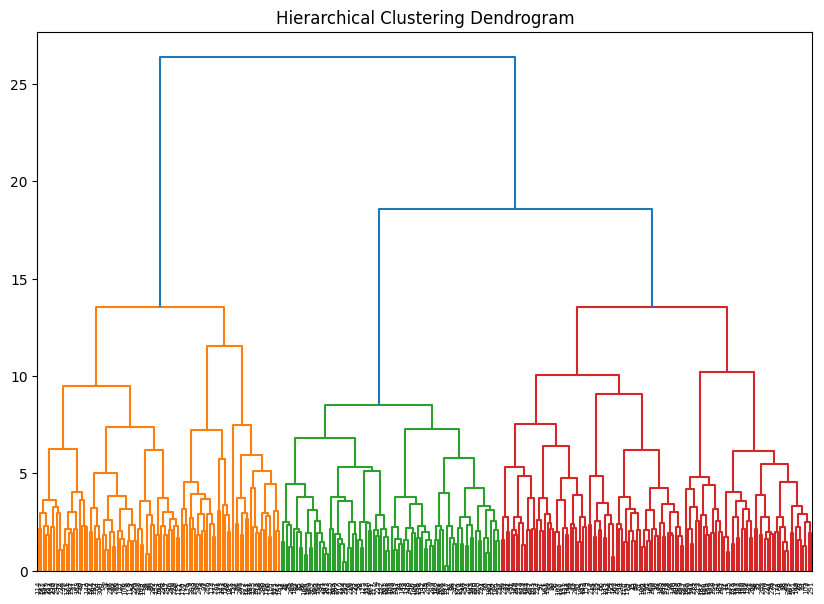

col_0    1    2
target         
0       16  148
1       79   60


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load cleaned dataset (or PCA for better clustering)
df_cleaned = pd.read_csv('cleaned_heart_disease.csv')  # Or 'pca_transformed_heart_disease.csv'
X = df_cleaned.drop('target', axis=1)

# 1. K-Means (Elbow method for K)
inertias = []
sil_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    if k > 1:
        sil_scores.append(silhouette_score(X, kmeans.labels_))

# Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose K (e.g., 2-3) and fit
optimal_k = 2  # Based on elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

# Compare with target
print(pd.crosstab(df_cleaned['target'], labels_kmeans))

# 2. Hierarchical Clustering
Z = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Cut dendrogram for clusters (e.g., 2 clusters)
from scipy.cluster.hierarchy import fcluster
labels_hier = fcluster(Z, t=2, criterion='maxclust')
print(pd.crosstab(df_cleaned['target'], labels_hier))